# ripe or rotten mango?

### imports

En esta sección se instalan las dependencias e importan las librerías necesarias para manipulación de datos, preprocesamiento, visualización y modelos de machine learning.

In [1]:
%reload_ext autoreload
%autoreload 2
%pip install -q -r ../requirements.txt --user

import sys
sys.path.append('../')  

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import pandas as pd 
from src.data import get_dataset, preprocess, graphic
from src.model import multivariate_regression, decision_tree, random_forest, neural_network

Note: you may need to restart the kernel to use updated packages.


### manejo de datos

Se descarga el conjunto de datos o en su defecto se carga de un archivo `train.csv` y creamos un DataFrame con los datos de entrenamiento para una inspección y análisis inicial.

In [2]:
dataset = get_dataset()
train_data = pd.DataFrame(dataset.train_data)
print(f"Train dataset shape: {train_data.shape}")

Loaded dataset ../data/raw\train.csv in 0.03 seconds.
Loaded dataset ../data/raw\validation.csv in 0.01 seconds.
Train dataset shape: (1989, 2)


### feature engineering

Inicializamos el preprocesamiento a partir del conjunto de datos de entrenamiento para extraer características y aplicar PCA, organizando los resultados en los DataFrames `features_data` y `pca_data` para su análisis y modelado posterior.

In [100]:
preprocessor = preprocess(dataset.train_data)
features_data = pd.DataFrame(preprocessor.features_data)
print(f"Features shape: {features_data.shape}")
features_data.describe()

Loaded dataset ../data/processed\features.csv in 20.88 seconds.
Features shape: (1989, 775)


,area,mean_r,mean_g,mean_b,std_dev_r,std_dev_g,std_dev_b,hist_0,hist_1,hist_2,...,hist_758,hist_759,hist_760,hist_761,hist_762,hist_763,hist_764,hist_765,hist_766,hist_767
count,1.989000e+03,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,...,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,6.685059e+04,181.854046,155.196007,126.786020,26.639887,27.660354,36.437425,0.295123,0.091503,0.076923,...,25.862242,34.162896,25.896430,33.275013,39.687783,50.937657,53.144796,66.493213,218.011564,874.575163
std,8.864969e+04,34.294345,38.557030,45.728988,10.555681,10.600771,17.150335,2.651806,1.208485,0.809660,...,155.273770,251.887797,101.293353,146.106492,123.184643,469.349899,336.739000,451.837125,1231.088768,4440.192961
min,1.083000e+03,76.756836,67.474856,14.339593,3.827603,5.637942,7.884951,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.530400e+04,153.235232,130.185822,92.556163,18.003269,20.049799,22.960395,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.800500e+04,177.447050,150.294597,128.293459,26.102443,25.818547,34.824957,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.991000e+04,205.149231,177.272506,150.121064,32.858022,32.503474,45.783679,0.000000,0.000000,0.000000,...,7.000000,5.000000,7.000000,7.000000,7.000000,6.000000,5.000000,6.000000,3.000000,13.000000
max,1.272680e+06,254.209087,253.923098,252.875468,76.380757,104.556292,116.152947,53.000000,45.000000,23.000000,...,4188.000000,6895.000000,2542.000000,2699.000000,1415.000000,16237.000000,13600.000000,14016.000000,36807.000000,40262.000000


In [ ]:
pca_data = pd.DataFrame(preprocessor.get_pca())
pca_data.columns.map(str)
print(f"PCA features shape: {pca_data.shape}")
pca_data.describe()

Loaded dataset ../data/processed\pca_default.csv in 0.15 seconds.
PCA features shape: (1989, 53)


,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
count,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,...,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03
mean,1.696872e-17,-3.572362e-17,-2.143417e-17,-1.643286e-16,-9.288140e-17,-1.428945e-16,4.644070e-17,9.734686e-17,2.500653e-17,-3.393744e-17,...,-1.946937e-16,5.771597e-17,-1.657799e-17,-3.000784e-16,6.117669e-17,-2.706064e-16,-1.723665e-16,1.402152e-16,-4.309161e-17,-4.599416e-17
std,6.971524e-02,3.013397e-01,2.044748e-01,1.494600e+00,1.044391e+00,7.407033e-01,6.746749e-01,5.944707e-01,5.226151e-01,4.930719e-01,...,1.250960e-01,1.182225e-01,1.173409e-01,1.142042e-01,1.137248e-01,1.093546e-01,1.080190e-01,1.054642e-01,1.044066e-01,1.036692e-01
min,-5.172047e-02,-7.852887e-01,-6.047252e-01,-1.784985e+00,-1.800193e+00,-2.623502e+00,-2.037526e+00,-2.115633e+00,-1.780714e+00,-2.965721e+00,...,-1.056527e+00,-7.955593e-01,-2.241139e+00,-6.652922e-01,-1.127443e+00,-5.844833e-01,-8.197254e-01,-9.379430e-01,-7.040780e-01,-5.005090e-01
25%,-3.267277e-02,-2.234793e-01,-1.710200e-01,-9.606206e-01,-7.420207e-01,-3.844417e-01,-5.040827e-01,-3.607003e-01,-1.923380e-01,-2.167643e-01,...,-5.238434e-02,-4.966083e-02,-4.112526e-02,-4.327633e-02,-4.256203e-02,-3.502925e-02,-3.155607e-02,-3.516433e-02,-4.180186e-02,-4.290886e-02
50%,-1.482041e-02,-5.264005e-02,1.709968e-02,-6.216558e-01,-3.343968e-01,-1.177744e-01,-9.204682e-02,-4.625562e-02,3.718313e-02,3.864160e-02,...,1.190933e-03,-5.991922e-03,3.158737e-04,-6.453119e-03,-7.904562e-04,-2.093506e-03,-2.482296e-03,5.702775e-03,-6.725149e-04,1.696699e-03
75%,2.405957e-03,1.595830e-01,1.137359e-01,4.046248e-01,2.099295e-01,2.867883e-01,3.792486e-01,2.509880e-01,1.852689e-01,2.549366e-01,...,5.395780e-02,5.311244e-02,3.824453e-02,4.246148e-02,3.650080e-02,3.683538e-02,3.176961e-02,3.374193e-02,4.026808e-02,3.900981e-02
max,9.482795e-01,7.721556e-01,1.174999e+00,4.940054e+00,2.817235e+00,3.972066e+00,2.588915e+00,2.854355e+00,3.816719e+00,1.960343e+00,...,9.855089e-01,8.879638e-01,1.068845e+00,7.360739e-01,6.842942e-01,8.762842e-01,9.977075e-01,8.013891e-01,8.264303e-01,8.913277e-01


### exploración

La clase `graphic` proporciona métodos para visualizar los datos extraídos, generar histogramas, analizar estadísticas de los canales de color RGB, explorar correlaciones y visualizar el análisis de componentes principales (PCA) aplicado a las características de las imágenes de mangos en el conjunto de datos.

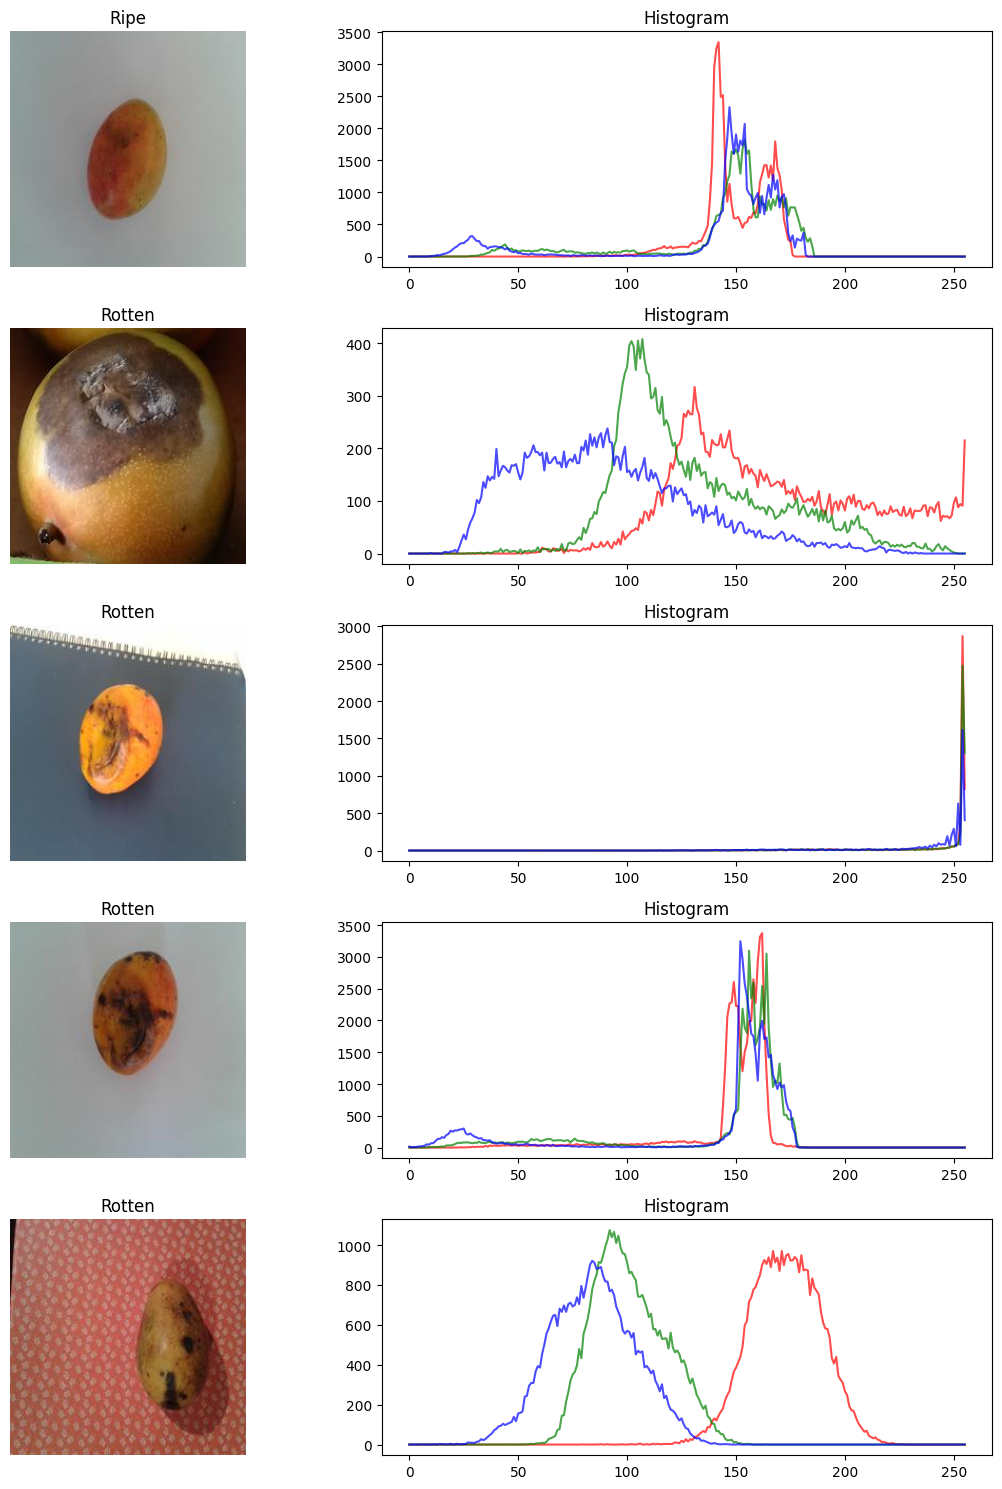

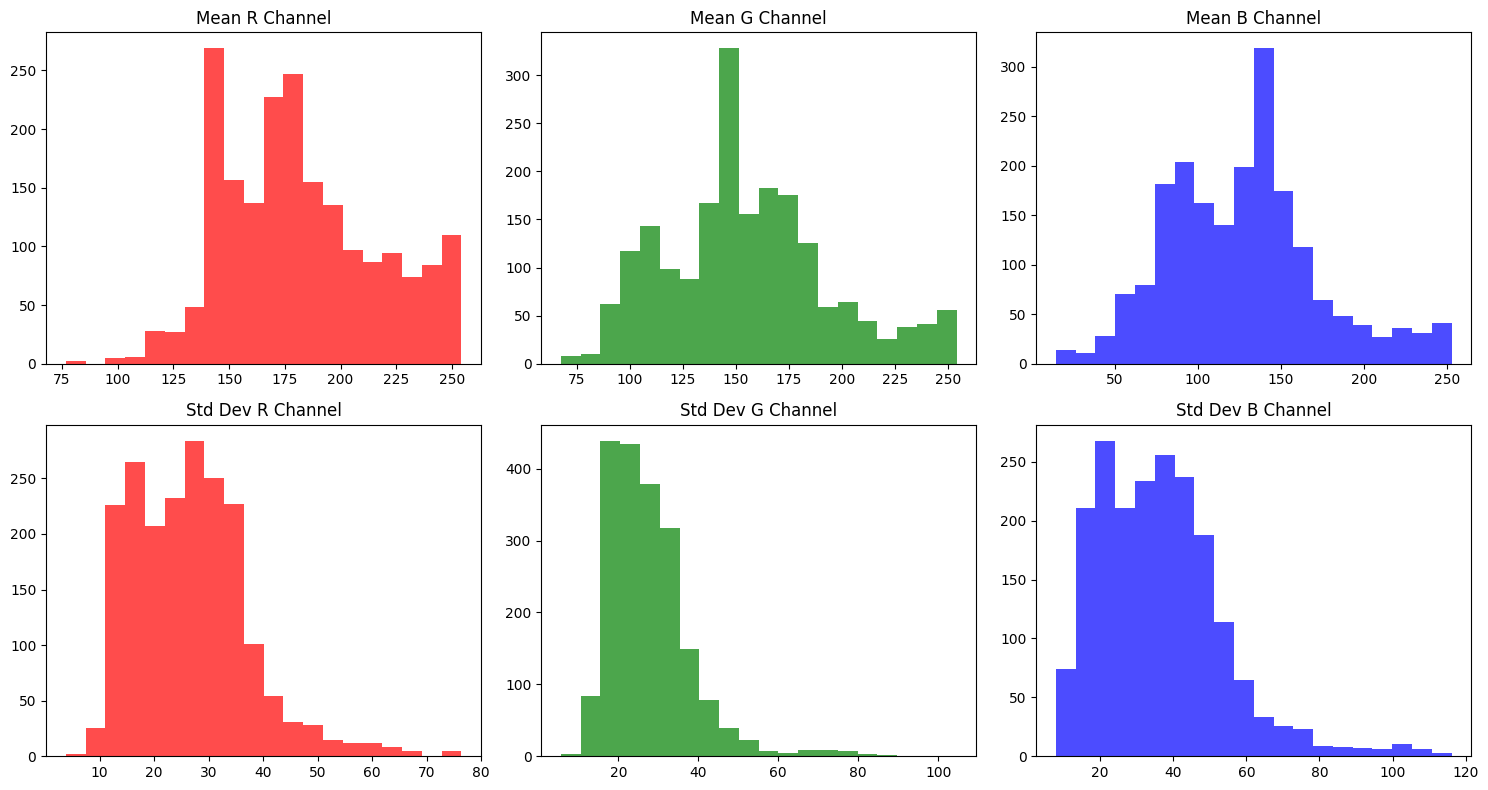

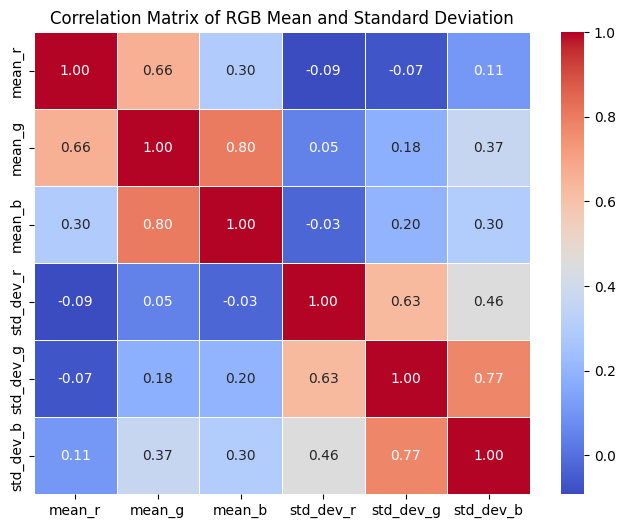

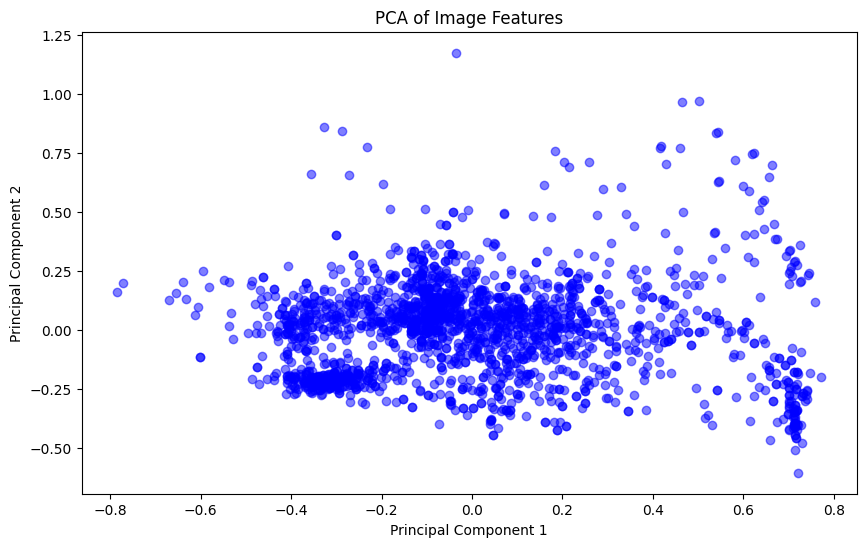

In [120]:
stats = features_data[['mean_r', 'mean_g', 'mean_b', 'std_dev_r', 'std_dev_g', 'std_dev_b']]
pca_x, pca_y = pca_data["1"], pca_data["2"]

graphic.show_samples(train_data, features_data)
graphic.show_channels(stats)
graphic.show_correlation(stats)
graphic.show_pca(pca_x, pca_y)

In [121]:
rnd = random_forest(features_data, train_data["label"])

Model trained successfully.
Accuracy: 0.9573

Classification Report:
              precision    recall  f1-score   support

        Ripe       0.99      0.85      0.91       104
      Rotten       0.95      1.00      0.97       294

    accuracy                           0.96       398
   macro avg       0.97      0.92      0.94       398
weighted avg       0.96      0.96      0.96       398

Confusion Matrix:
[[ 88  16]
 [  1 293]]
